# Relatório de Análise VII

## Criando Agrupamentos

In [27]:
import pandas as pd

In [28]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

In [29]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado,Valor m²
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento,53.33
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento,16.67
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento,26.00
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento,21.43
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento,16.67
5,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento,50.00
6,Apartamento,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0,17.59,Apartamento,17.59
7,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,25.37,Apartamento,25.37
8,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,17.27,Apartamento,17.27
9,Apartamento,Olaria,3,1,0,68,1000.0,670.0,0.0,14.71,Apartamento,14.71


#### https://pandas.pydata.org/pandas-docs/stable/reference/frame.htmlm

In [30]:
dados['Valor'].mean()

3491.816256760894

In [31]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [32]:
dados['Bairro'].drop_duplicates()

5           Copacabana
7      Barra da Tijuca
8               Tijuca
11             Ipanema
14            Botafogo
17              Leblon
105           Flamengo
Name: Bairro, dtype: object

In [33]:
grupo_bairro = dados.groupby('Bairro')

In [34]:
type(grupo_bairro)

pandas.core.groupby.groupby.DataFrameGroupBy

In [35]:
grupo_bairro.groups

{'Barra da Tijuca': Int64Index([    7,    13,    19,    21,    24,    31,    44,    47,    51,
                56,
             ...
             18776, 18777, 18778, 18779, 18780, 18781, 18783, 18784, 19159,
             19562],
            dtype='int64', length=3383),
 'Botafogo': Int64Index([   14,    35,    66,    67,    85,    91,    96,   102,   147,
               151,
             ...
             19506, 19510, 19535, 19563, 19567, 19570, 19576, 19579, 19583,
             19584],
            dtype='int64', length=843),
 'Copacabana': Int64Index([    5,    15,    20,    69,    78,    83,    97,   107,   108,
               109,
             ...
             19544, 19551, 19554, 19555, 19561, 19564, 19572, 19590, 19592,
             19596],
            dtype='int64', length=2444),
 'Flamengo': Int64Index([  105,   165,   215,   239,   256,   264,   268,   276,   319,
               323,
             ...
             19541, 19545, 19556, 19560, 19565, 19580, 19581, 19582, 19588,
  

In [36]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Barra da Tijuca -> 5500.497783032811
Botafogo -> 3380.801897983393
Copacabana -> 3351.66325695581
Flamengo -> 3220.119266055046
Ipanema -> 5451.549307253464
Leblon -> 5661.45393258427
Tijuca -> 1998.1845018450185


In [37]:
grupo_bairro[(['Valor', 'Condominio'])].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,5500.50,3588.23
Botafogo,3380.80,946.04
Copacabana,3351.66,1039.63
Flamengo,3220.12,933.88
Ipanema,5451.55,1674.58
Leblon,5661.45,1617.80
Tijuca,1998.18,720.38


## Estatísticas Descritivas

In [40]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3383.0,5500.50,5123.02,800.0,2400.00,3700.0,6700.0,32000.0
Botafogo,843.0,3380.80,2021.81,700.0,2200.00,3000.0,4300.0,22000.0
Copacabana,2444.0,3351.66,1904.95,100.0,1911.25,2900.0,4200.0,9900.0
Flamengo,654.0,3220.12,1958.30,800.0,1800.00,2700.0,4000.0,9500.0
Ipanema,1227.0,5451.55,2093.76,1200.0,3759.00,5500.0,7000.0,9900.0
Leblon,890.0,5661.45,2746.71,100.0,3900.00,5000.0,7000.0,30000.0
Tijuca,1084.0,1998.18,1043.96,750.0,1500.00,1800.0,2300.0,19000.0


In [44]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,800.0,32000.0
Botafogo,700.0,22000.0
Copacabana,100.0,9900.0
Flamengo,800.0,9500.0
Ipanema,1200.0,9900.0
Leblon,100.0,30000.0
Tijuca,750.0,19000.0


In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5,1,'Valor Médio do Alguel por Bairro')

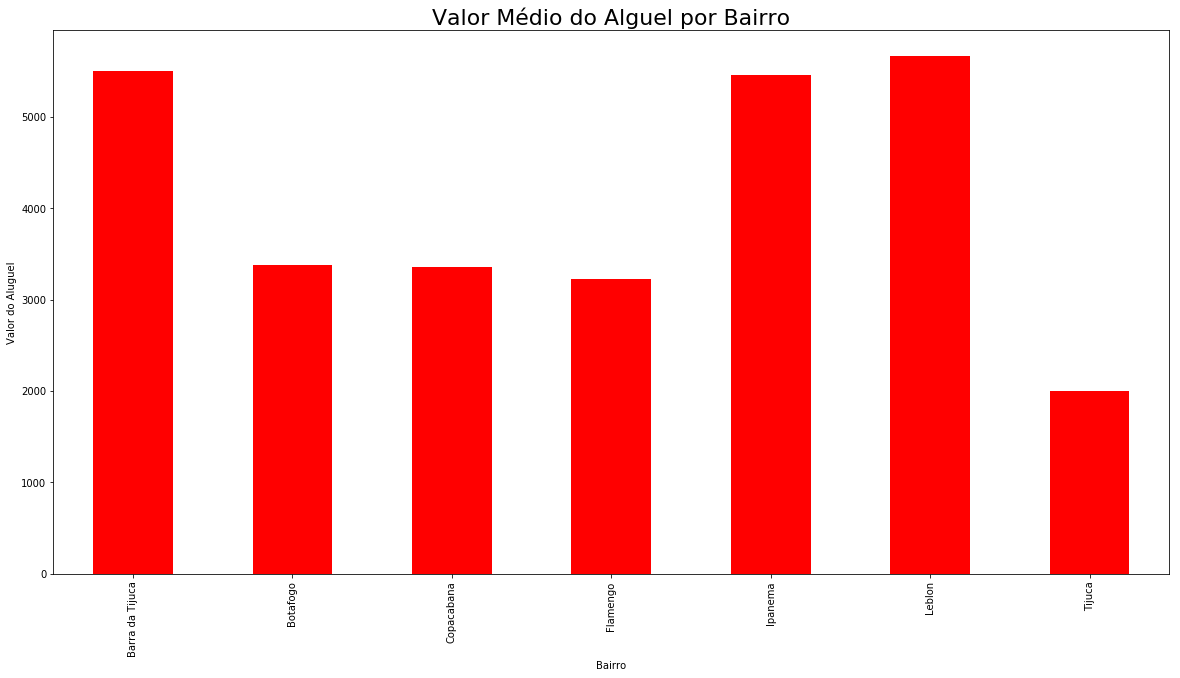

In [52]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'red')
# Criar um nome para o eixo y
fig.set_ylabel('Valor do Aluguel')
# Criar um titulo para o gráfico
fig.set_title('Valor Médio do Alguel por Bairro', {'fontsize': 22})

Text(0.5,1,'Valor Médio do Alguel por Bairro')

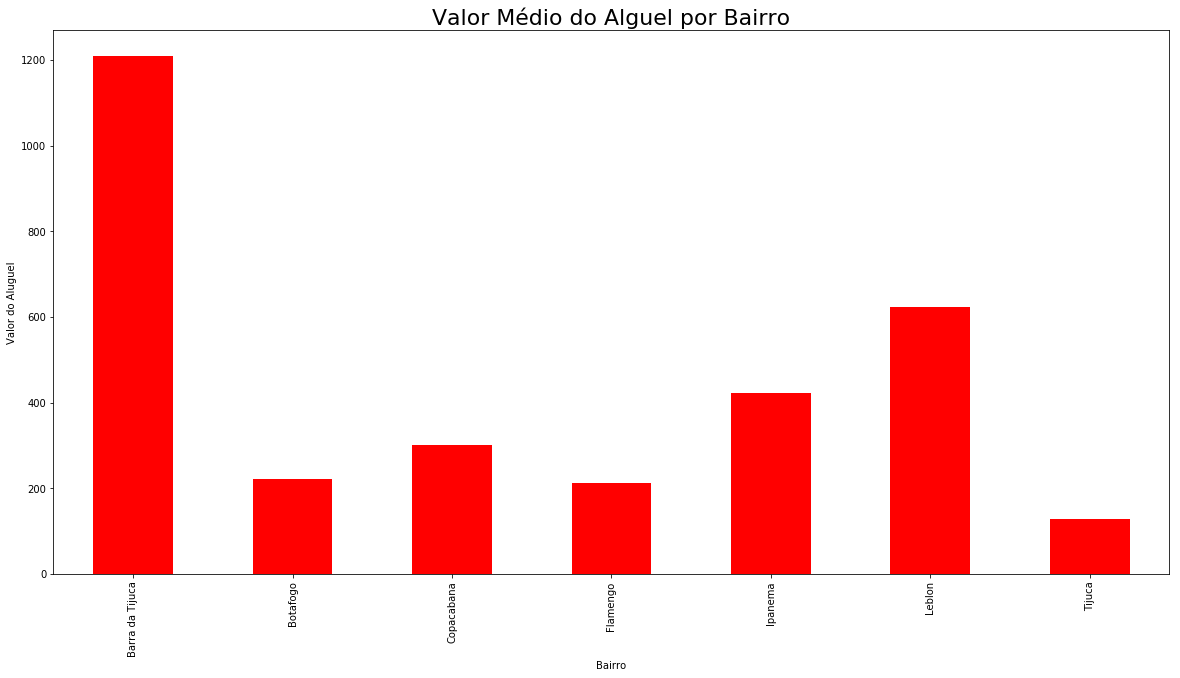

In [54]:
fig = grupo_bairro['IPTU'].mean().plot.bar(color = 'red')
# Criar um nome para o eixo y
fig.set_ylabel('Valor do Aluguel')
# Criar um titulo para o gráfico
fig.set_title('Valor Médio do Alguel por Bairro', {'fontsize': 22})